In [62]:
# Importing necessary libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import re

# Set plotting font to Segoe UI (font used for the report)
plt.rcParams['font.family'] = 'Segoe UI'

# Load the dataset
df = pd.read_csv("clean.csv")

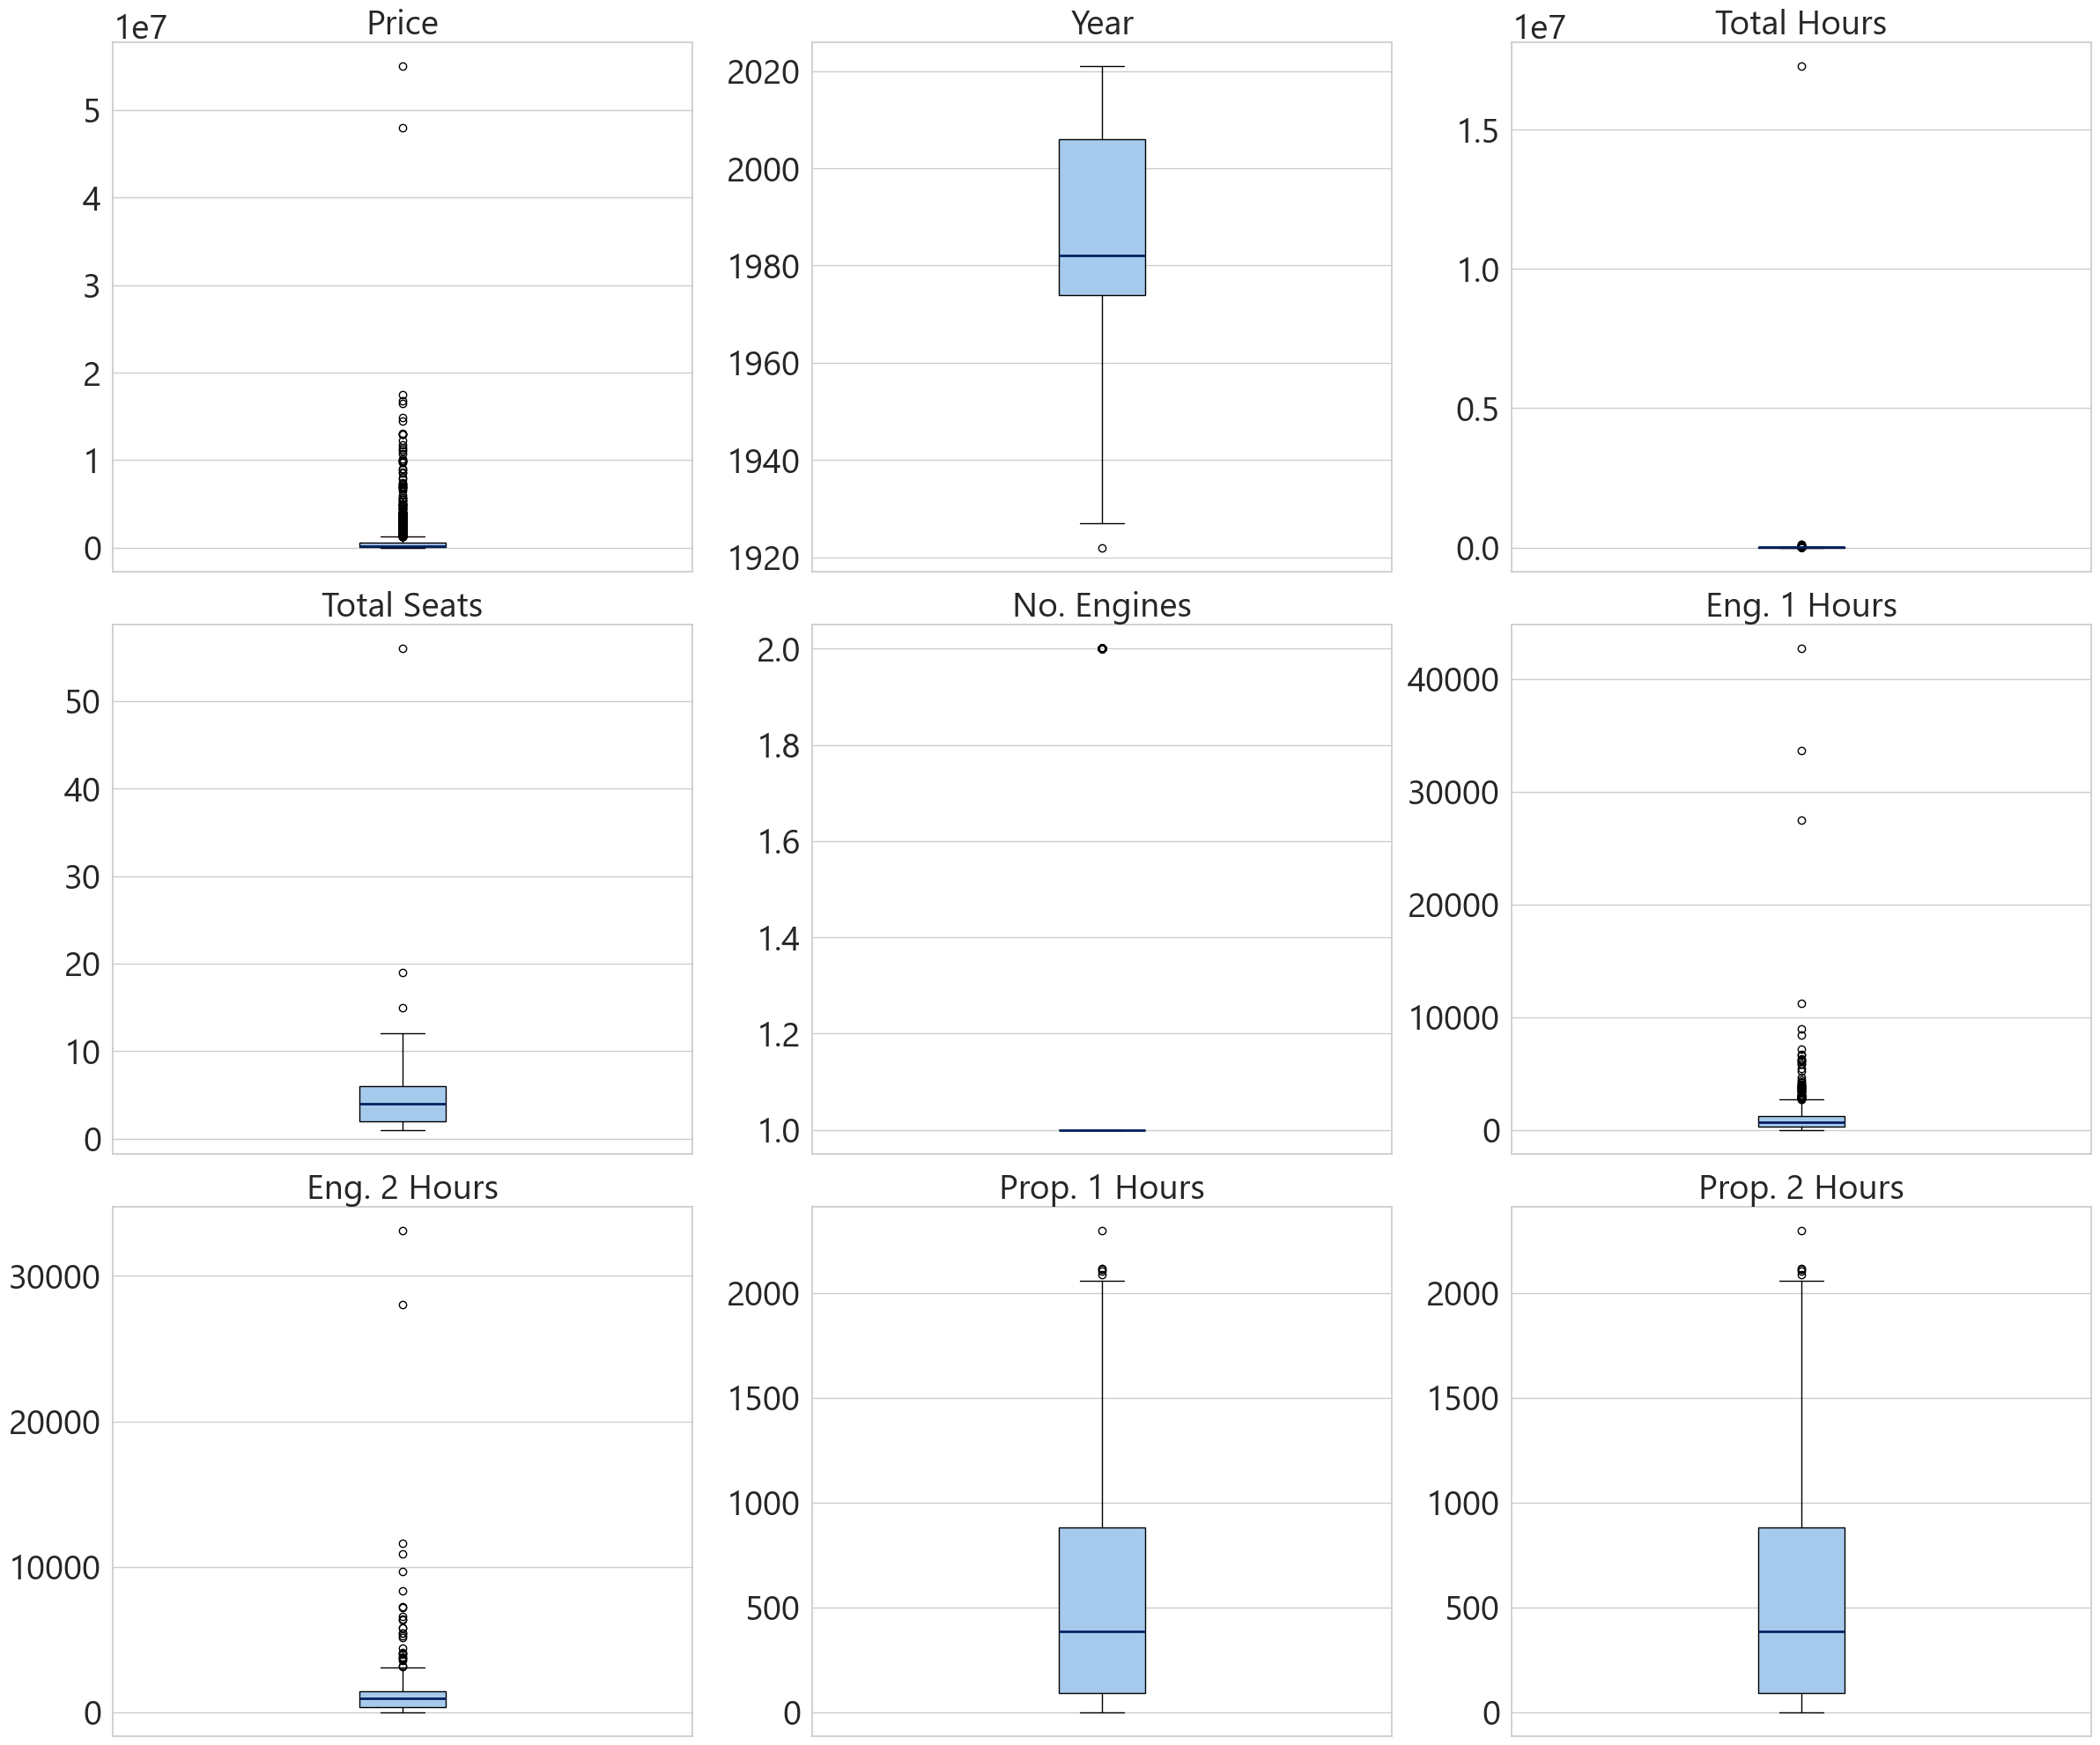

(2363, 26)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Set up image style
n_cols = 3
n_rows = 3
figsize = (24, 20)  
box_color = '#A6CAEC'  
median_color = '#002060'  
title_size = 28  
label_size = 28  
tick_size = 28  
scale_text_size = 28  
row_spacing = 0.1  

# Create figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]

    data = df[col].dropna()
    
    ax.boxplot(data, vert=True, patch_artist=True,
               boxprops=dict(facecolor=box_color),
               medianprops=dict(color=median_color, linewidth=2))
    
    ax.set_title(f'{col}', fontsize=title_size)
    ax.tick_params(axis='both', labelsize=tick_size)

    ax.yaxis.get_offset_text().set_fontsize(scale_text_size)

    ax.set_xticks([])


for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()

plt.subplots_adjust(hspace=row_spacing)

plt.show()

print(df.shape)

In [64]:
# YEAR

# Compute first quantile (Q1) and third quantile (Q3) of 'Year' column
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
# Compute IQR
IQR = Q3 - Q1
# Define top and bottom limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Filter the dataset to remove the rows with outliers in 'Year' column
df_filtered = df[(df['Year'].isna()) | ((df['Year'] >= lower_limit) & (df['Year'] <= upper_limit))]
# Outliers detected and deleted
df_removed = df[~df.index.isin(df_filtered.index)]

#print(df_removed)
print(df_filtered.shape)

df = df_filtered

(2362, 26)


In [65]:
# PRICE

# Order the dataset in a descending order for 'Price' column
df_sorted = df.sort_values(by='Price', ascending=False)
# Select the rows with the two largest values of 'Price'
df_removed = df_sorted.head(2)
#print(df_removed)
# Remove the two rows detected
df = df.drop(df_removed.index)
#print(df_filtered.shape)

# The two outliers correpond to commercial aircraft: Boing 737 and Airbus 320, let's remove any other row with these models to keep the dataset focus on smaller aircrafts
model_counts = df['Model'].value_counts()
# Count the number of '737', '320' and 'A320' values
count_737 = model_counts.get('737', 0)  # if not existing, 0 will be provided --- 2
count_320 = model_counts.get('320', 0)  # if not existing, 0 will be provided --- 1
count_A320 = model_counts.get('A320', 0)  # if not existing, 0 will be provided --- 1
count_727 = model_counts.get('727', 0)  # if not existing, 0 will be provided --- 1
# print(f'Number of "737": {count_737}')
# print(f'Number of  "320": {count_320}')
# print(f'Number of  "A320": {count_A320}'
#print(f'Number of  "727": {count_727}')
# Delete columns with these values into 'Model' column
df = df[~df['Model'].isin(['737', '320', 'A320', '727'])]
print(df.shape)

(2356, 26)


(2355, 26)


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\1454078673.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Total Hours', palette=blue_palette)


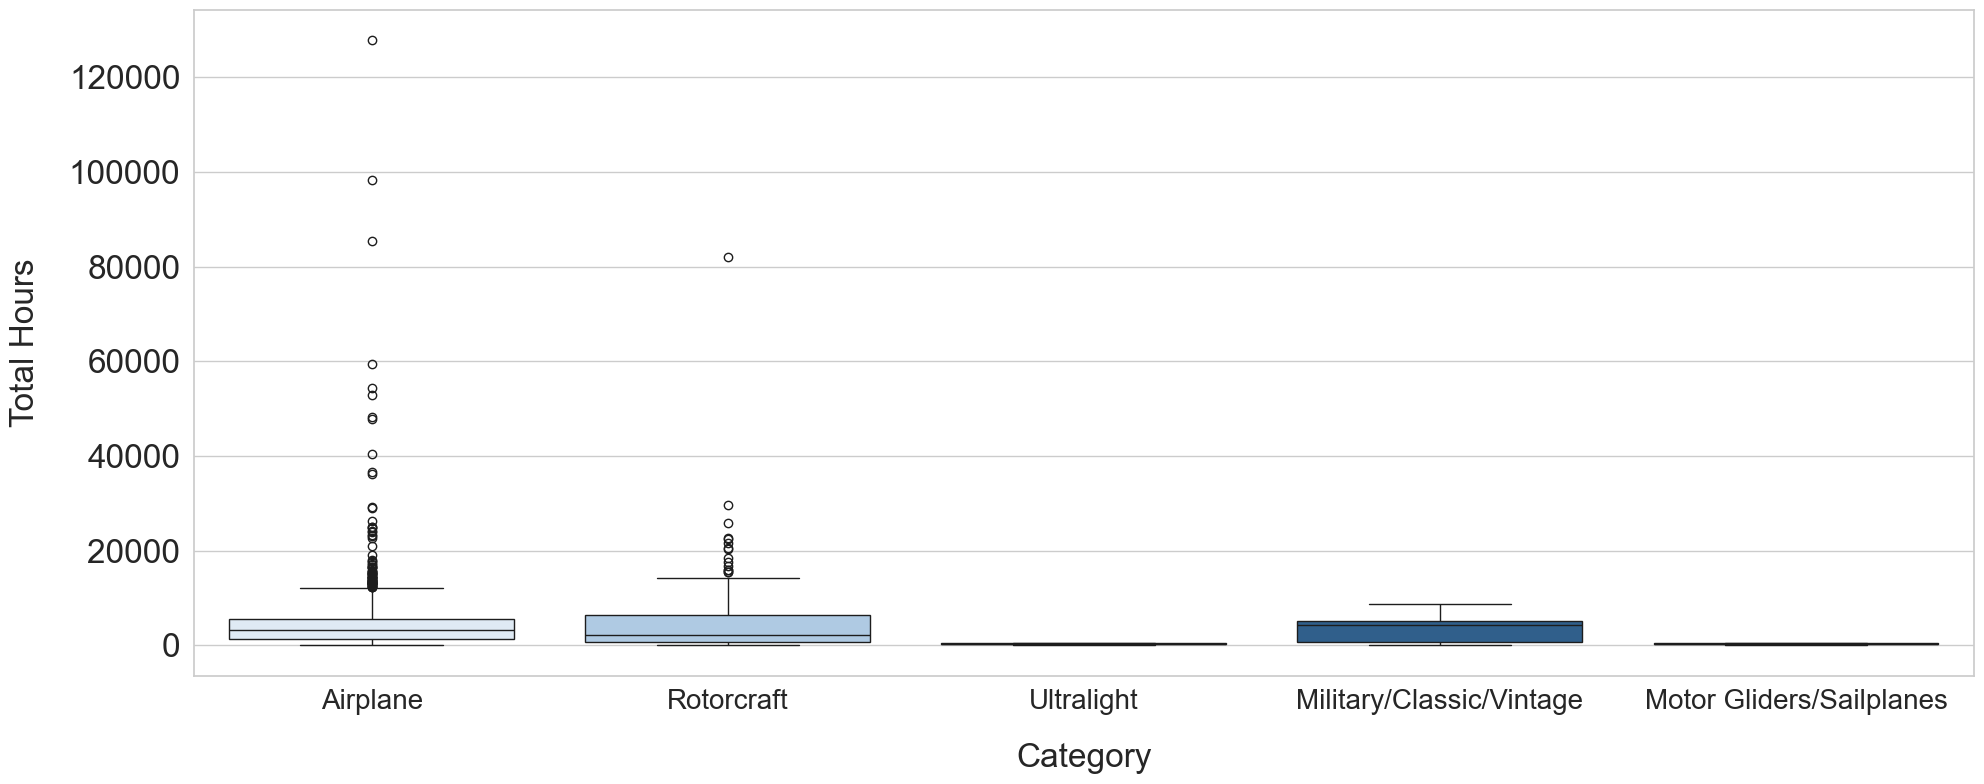

(2339, 26)


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\1454078673.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Total Hours', palette=blue_palette)


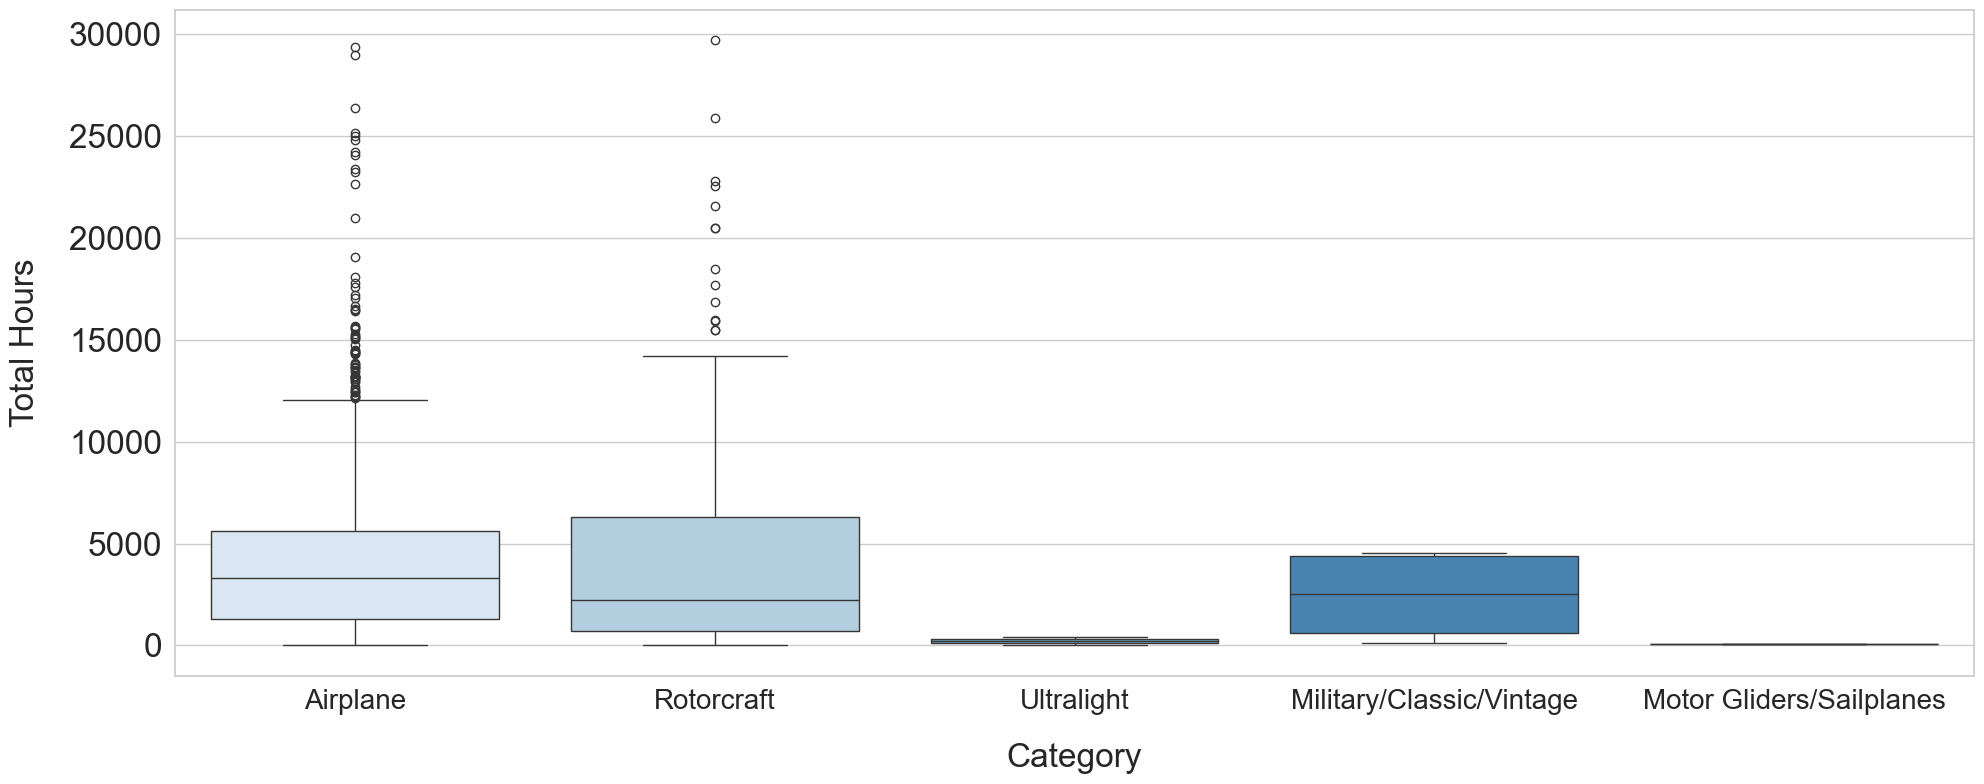

In [ ]:
# TOTAL HOURS 

# Remove row with largest value of Total Hours for the first boxplot to be representative
index_max_hours = df['Total Hours'].idxmax()
df = df.drop(index_max_hours)
print(df.shape)

# Plot boxplot for the different types of categories
# Personalize palette in blue tones
blue_palette = ['#DCEAF7', '#A6CAEC', '#4E95D9', '#215F9A', '#002060']
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='Category', y='Total Hours', palette=blue_palette)
# Personalize the graphic
plt.xlabel('Category', fontsize=24, labelpad=20)
plt.ylabel('Total Hours', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20)  
plt.yticks(fontsize=24) 
# Show graphic
plt.tight_layout()
plt.show()



# As I am getting an error using the IQR method for the fifth types of categories, I will delete the outliers manually:
# Create a dataset for deleting the rows depending on the type of propulsion and values of Eng. 1 Hours

# 1. Filter rows with Category = Airplane and delete the 11 rows with largest Total Hours
aircraft_df = df[df['Category'] == 'Airplane']
aircraft_to_remove = aircraft_df.nlargest(11, 'Total Hours') # ---> <30,000
# 2. Filter rows with Category = Rotorcraft and delete the 3 rows with largest Total Hours
rotorcraft_df = df[df['Category'] == 'Rotorcraft'] # ---> <30,000
rotorcraft_to_remove = rotorcraft_df.nlargest(1, 'Total Hours')
# 3. Filter rows with Category = Military/Classic/Vintage and delete the 2 rows with largest Total Hours
military_df = df[df['Category'] == 'Military/Classic/Vintage']
military_to_remove = military_df.nlargest(2, 'Total Hours')
# 4. Filter rows with Category = Ultralight and delete the 1 rows with largest Total Hours
ultralight_df = df[df['Category'] == 'Ultralight']
ultralight_to_remove = ultralight_df.nlargest(1, 'Total Hours')
# 5. Filter rows with Category = Motor Gliders/Sailplanes and delete the 1 rows with largest Total Hours
glider_df = df[df['Category'] == 'Motor Gliders/Sailplanes']
glider_to_remove = glider_df.nlargest(1, 'Total Hours')
# 6. Concanate the rows to be deleted
rows_to_remove = pd.concat([aircraft_to_remove, rotorcraft_to_remove, military_to_remove, ultralight_to_remove, glider_to_remove])
# Delete these rows from the original dataset
df = df[~df.index.isin(rows_to_remove.index)]
print(df.shape)  



# Plot resulting boxplot for the different types of category
# Personalize palette in blue tones
blue_palette = sns.color_palette("Blues", n_colors=df['Category'].nunique())
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='Category', y='Total Hours', palette=blue_palette)
# Personalize the graphic
plt.xlabel('Category', fontsize=24, labelpad=20)
plt.ylabel('Total Hours', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20)  
plt.yticks(fontsize=24)  
# Show graphic
plt.tight_layout()
plt.show()

In [67]:
# TOTAL SEATS

# Compute first quantile (Q1) and third quantile (Q3) of 'Total Seats' column
Q1 = df['Total Seats'].quantile(0.25)
Q3 = df['Total Seats'].quantile(0.75)
# Compute IQR
IQR = Q3 - Q1
# Define top and bottom limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Filter the dataset to remove the rows with outliers in 'Total Seats' column
df_filtered = df[(df['Total Seats'].isna()) | ((df['Total Seats'] >= lower_limit) & (df['Total Seats'] <= upper_limit))]
# Outliers detected and deleted
df_removed = df[~df.index.isin(df_filtered.index)]

df = df_filtered
#print(df_removed)
print(df.shape)

(2336, 26)


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\3710491976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Propulsion', y='Eng. 1 Hours', palette=blue_palette)


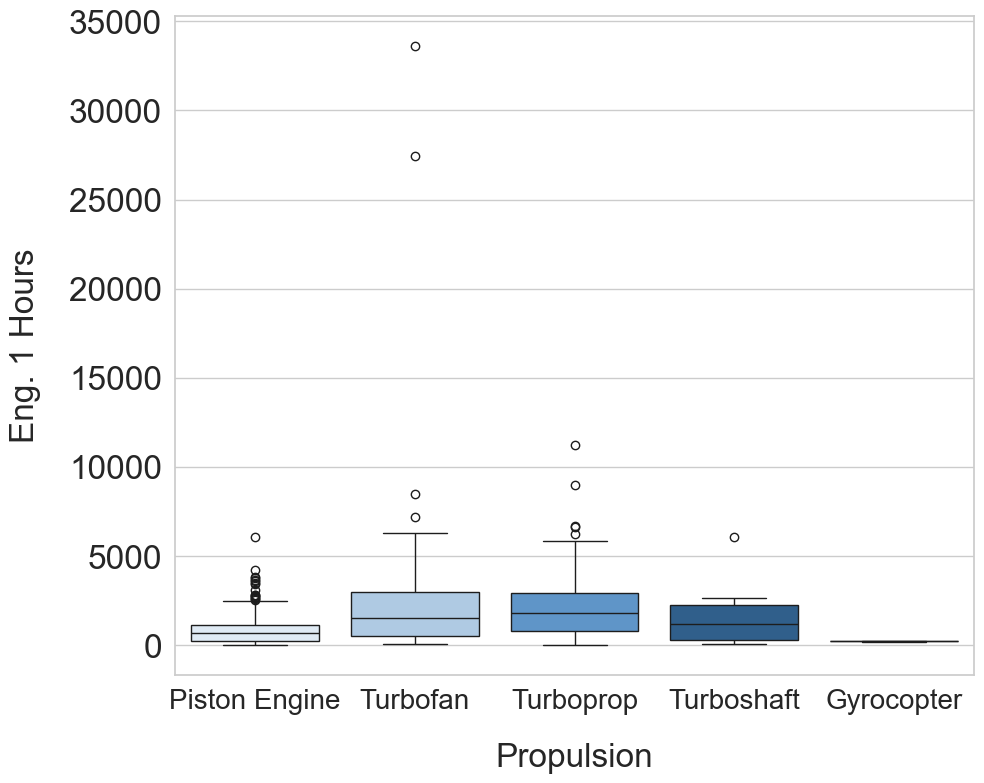

(2303, 26)


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\3710491976.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Propulsion', y='Eng. 1 Hours', palette=blue_palette)


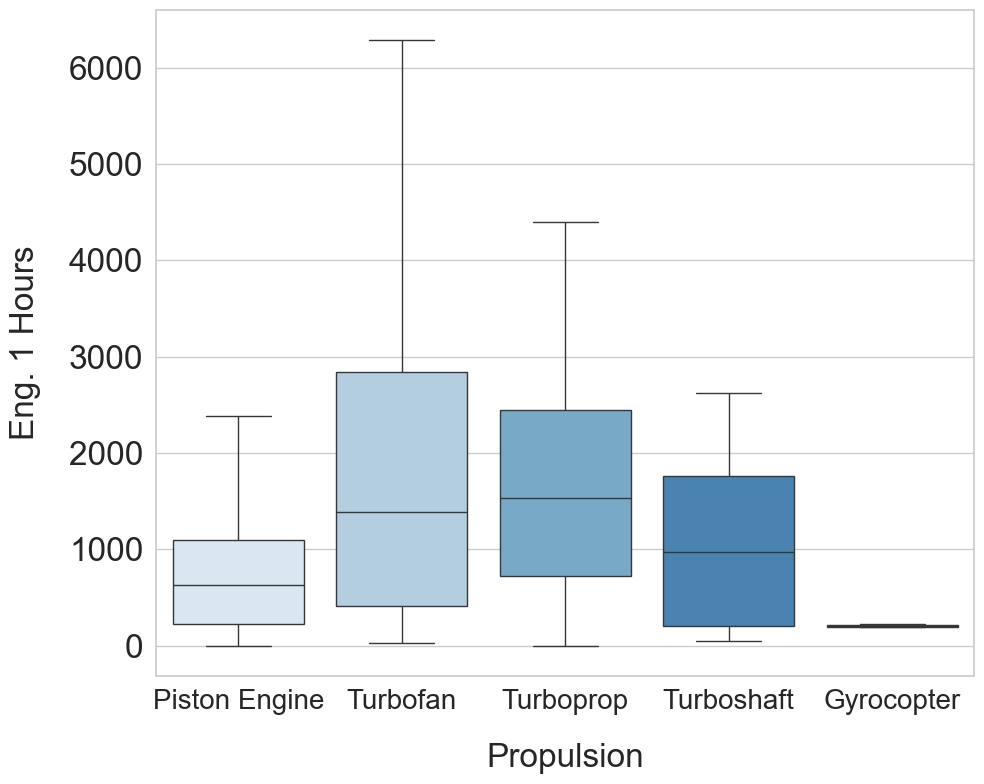

In [ ]:
# ENG. 1 HOURS

# Plot boxplot for the different types of propulsion
# Personalize palette in blue tones
blue_palette = ['#DCEAF7', '#A6CAEC', '#4E95D9', '#215F9A', '#002060']
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Propulsion', y='Eng. 1 Hours', palette=blue_palette)
# Personalize the graphic
plt.xlabel('Propulsion', fontsize=24, labelpad=20)
plt.ylabel('Eng. 1 Hours', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20) 
plt.yticks(fontsize=24) 
# Show graphic
plt.tight_layout()
plt.show()



# As I am getting an error using the IQR method for the fourth types of propuslsion, I will delete the outliers manually:
# Create a dataset for deleting the rows depending on the type of propulsion and values of Eng. 1 Hours

# 1. Filter rows with Propulsion = Piston Engine and delete the 19 with largest Eng. 1 Hours
piston_engine_df = df[df['Propulsion'] == 'Piston Engine']
piston_engine_to_remove = piston_engine_df.nlargest(19, 'Eng. 1 Hours')
# 2. Filter rows with Propulsion = Turbofan and delete the 4 with largest Eng. 1 Hours
turbofan_df = df[df['Propulsion'] == 'Turbofan']
turbofan_to_remove = turbofan_df.nlargest(4, 'Eng. 1 Hours')
# 3. Filter rows with Propulsion = Turboprop and delete the 9 with largest Eng. 1 Hours
turboprop_df = df[df['Propulsion'] == 'Turboprop']
turboprop_to_remove = turboprop_df.nlargest(9, 'Eng. 1 Hours')
# 4. FFilter rows with Propulsion = Turboshaft and delete the 1 with largest Eng. 1 Hours
turboshaft_df = df[df['Propulsion'] == 'Turboshaft']
turboshaft_to_remove = turboshaft_df.nlargest(1, 'Eng. 1 Hours')
# 5. Concanate the rows to be deleted
rows_to_remove = pd.concat([piston_engine_to_remove, turbofan_to_remove, turboprop_to_remove, turboshaft_to_remove])
# EDelete these rows from the original dataset
df_filtered = df[~df.index.isin(rows_to_remove.index)]
print(df_filtered.shape)  


df = df_filtered

# Plot resulting boxplot for the different types of propulsion
# Personalize palette in blue tones
blue_palette = sns.color_palette("Blues", n_colors=df['Propulsion'].nunique())
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Propulsion', y='Eng. 1 Hours', palette=blue_palette)
# Personalize the graphic
plt.ylabel('Eng. 1 Hours', fontsize=24, labelpad=20)
plt.xlabel('Propulsion', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20) 
plt.yticks(fontsize=24) 
# Show graphic
plt.tight_layout()
plt.show()
   

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\2922627153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reduced, x='Propulsion', y='Eng. 2 Hours', palette=blue_palette)
C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\2922627153.py:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=df_reduced, x='Propulsion', y='Eng. 2 Hours', palette=blue_palette)


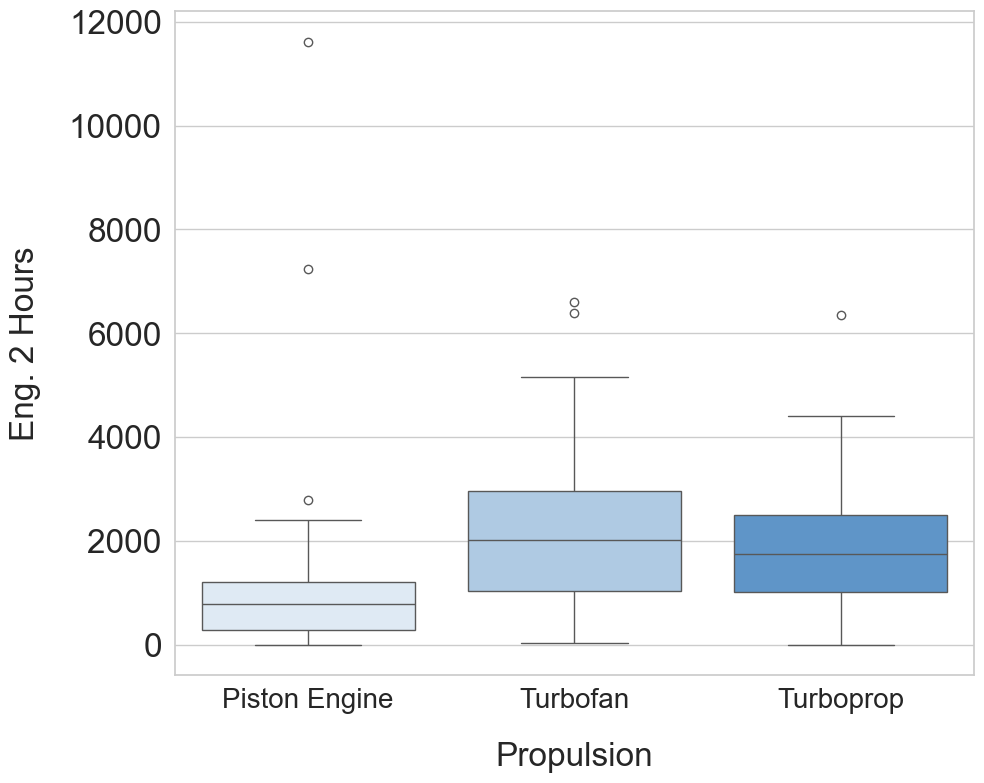

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_19064\2922627153.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reduced, x='Propulsion', y='Eng. 2 Hours', palette=blue_palette)


(2297, 26)


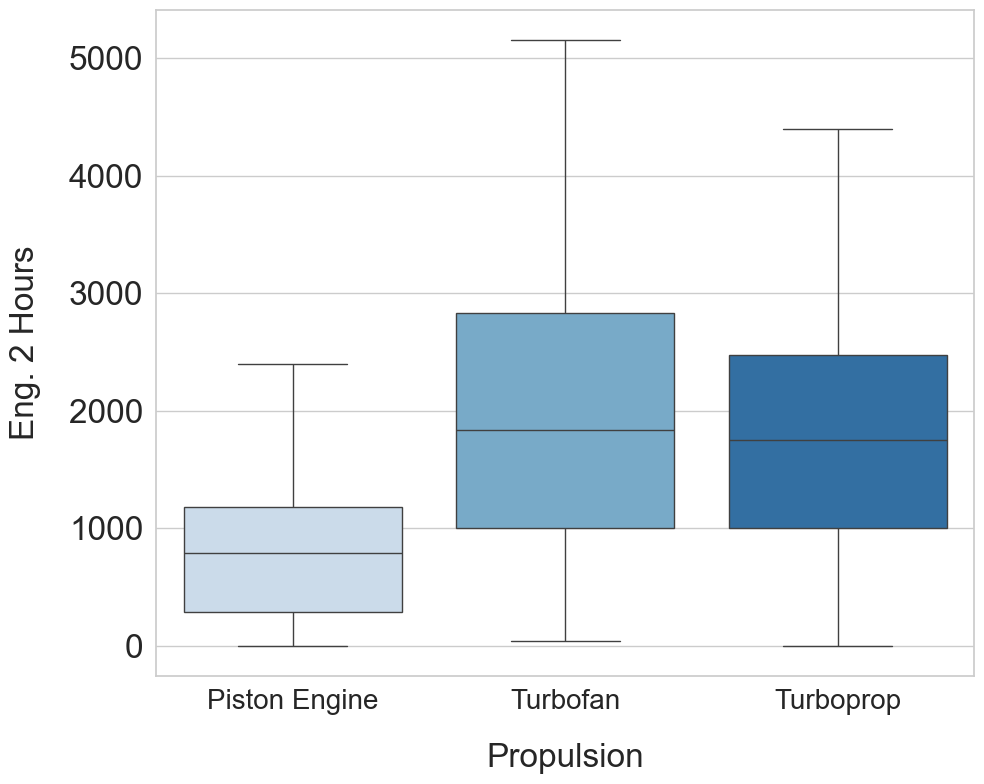

In [ ]:
# ENG. 2 HOURS

# Plot boxplot for the different types of propulsion, filter to show just Piston Engine, Turboprop and Turbofan:
df_reduced = df[df['Propulsion'].isin(['Piston Engine', 'Turbofan', 'Turboprop'])]
# Personalize palette in blue tones
blue_palette = ['#DCEAF7', '#A6CAEC', '#4E95D9', '#215F9A', '#002060']
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_reduced, x='Propulsion', y='Eng. 2 Hours', palette=blue_palette)
# Personalize the graphic
plt.xlabel('Propulsion', fontsize=24, labelpad=20)
plt.ylabel('Eng. 2 Hours', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20) 
plt.yticks(fontsize=24) 
# Show graphic
plt.tight_layout()
plt.show()



# As I am getting an error using the IQR method for the fourth types of propuslsion, I will delete the outliers manually:
# Create a dataset for deleting the rows depending on the type of propulsion and values of Eng. 2 Hours

# 1. Filter rows with Propulsion = Piston Engine and delete the 3 with largest Eng. 2 Hours
piston_engine_df = df[df['Propulsion'] == 'Piston Engine']
piston_engine_to_remove = piston_engine_df.nlargest(3, 'Eng. 2 Hours')
# 2. Filter rows with Propulsion = Turbofan and delete the 4 with largest Eng. 2 Hours
turbofan_df = df[df['Propulsion'] == 'Turbofan']
turbofan_to_remove = turbofan_df.nlargest(2, 'Eng. 2 Hours')
# 3. Filter rows with Propulsion = Turboprop and delete the 9 with largest Eng. 2 Hours
turboprop_df = df[df['Propulsion'] == 'Turboprop']
turboprop_to_remove = turboprop_df.nlargest(1, 'Eng. 2 Hours')
# 4. Filter rows with Propulsion = Turboshaft and delete the 1 with largest Eng. 2 Hours
turboshaft_df = df[df['Propulsion'] == 'Turboshaft']
turboshaft_to_remove = turboshaft_df.nlargest(0, 'Eng. 2 Hours')
# 5. Concanate the rows to be deleted
rows_to_remove = pd.concat([piston_engine_to_remove, turbofan_to_remove, turboprop_to_remove, turboshaft_to_remove])
# Delete these rows from the original dataset
df_filtered = df[~df.index.isin(rows_to_remove.index)]
print(df_filtered.shape)  



# Plot boxplot for the different types of propulsion, filter to show just Piston Engine, Turboprop and Turbofan:
df_reduced = df_filtered[df_filtered['Propulsion'].isin(['Piston Engine', 'Turbofan', 'Turboprop'])]
# Personalize palette in blue tones
blue_palette = sns.color_palette("Blues", n_colors=df_reduced['Propulsion'].nunique())
# Create boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_reduced, x='Propulsion', y='Eng. 2 Hours', palette=blue_palette)
plt.xlabel('Propulsion', fontsize=24, labelpad=20)
plt.xlabel('Propulsion', fontsize=24, labelpad=20)
plt.ylabel('Eng. 2 Hours', fontsize=24, labelpad=20)
plt.xticks(rotation=0)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
# Show graphic
plt.tight_layout()
plt.show()

df = df_filtered



In [70]:
# Prop. 1 Hours - Keep only < 3,500 hours (remove largest 6 rows)

# Order the dataset in a descending order for 'Total Hours' column
df_sorted = df.sort_values(by='Prop. 1 Hours', ascending=False)
# Select the rows with the largest value of 'Total Hours'
df_removed = df_sorted.head(6)
#print(df_removed)
# Remove the rows detected
df = df.drop(df_removed.index)
print(df.shape)

(2291, 26)


In [71]:
# Prop. 2 Hours - Keep only < 3,500 hours ---> All values under 3,500, no row need to be deleted

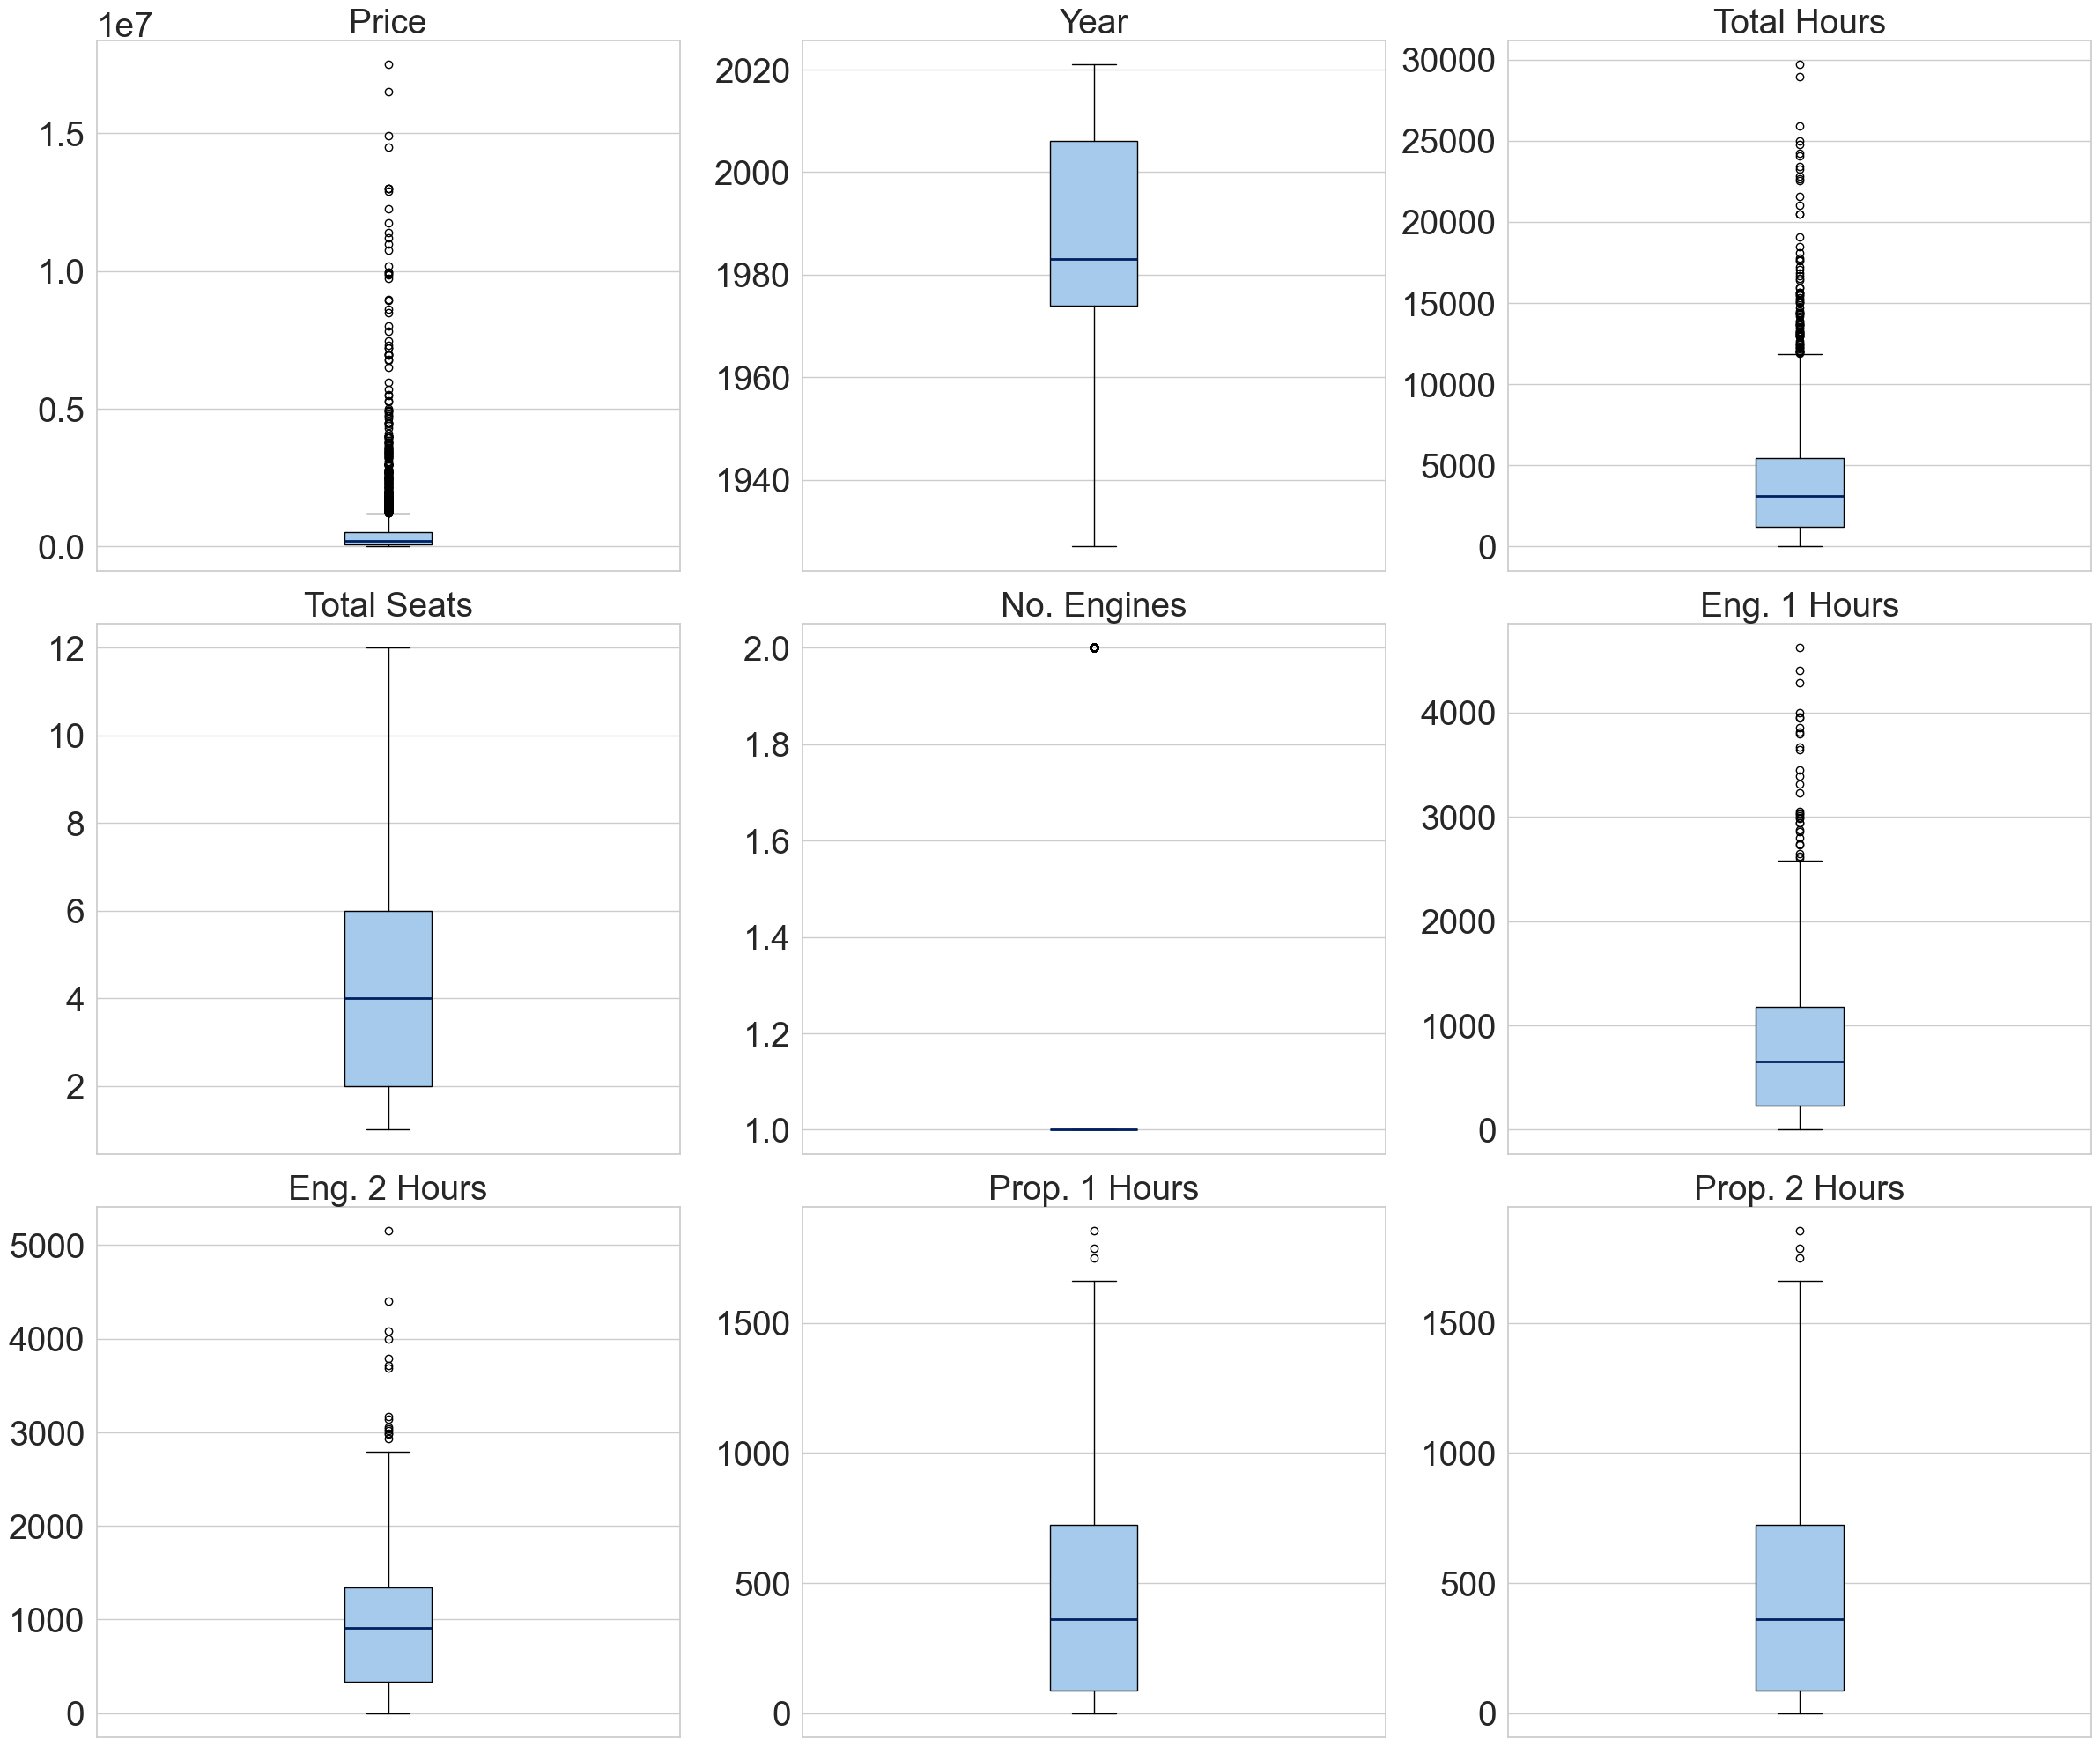

(2291, 26)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric variables
numeric_columns = df.select_dtypes(include=np.number).columns

# Configure image style
n_cols = 3
n_rows = 3
figsize = (24, 20) 
box_color = '#A6CAEC'
median_color = '#002060'
title_size = 28  
label_size = 28 
tick_size = 28 
scale_text_size = 28 
row_spacing = 0.1 

# Create figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]

    data = df[col].dropna()
    
    ax.boxplot(data, vert=True, patch_artist=True,
               boxprops=dict(facecolor=box_color),
               medianprops=dict(color=median_color, linewidth=2))
    
    ax.set_title(f'{col}', fontsize=title_size)
    ax.tick_params(axis='both', labelsize=tick_size)

    ax.yaxis.get_offset_text().set_fontsize(scale_text_size)

    ax.set_xticks([])

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.subplots_adjust(hspace=row_spacing)

plt.show()

print(df.shape)

In [73]:
# Save the Outliers Treated DataFrame into a CSV file
df.to_csv(r'C:\Users\Ángela Martín Milán\Desktop\TFM\OutliersTreated.csv', index=False)